In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def euclidean_distance(x, mean):
    return np.sqrt((x[0]- mean[0])**2 + (x[1]-mean[1])**2)

In [3]:
def get_z(x, means):   
    distance = [euclidean_distance(x, mean) for mean in means]
    return np.argmin(distance)

In [4]:
def sort_to_cluster(X, Z, k):
    cluster = 0
    sorted_clusters = []
    while(cluster != k):
        tmp_cluster = []
        for index, x in enumerate(X):
            if(Z[index]==cluster):
                tmp_cluster.append(x)
        cluster+=1;
        sorted_clusters.append(tmp_cluster)
    return sorted_clusters

In [5]:
def calculate_new_mean(cluster):
    x_coords = []
    y_coords = []
    #generate random mean if cluster has no nearest neighbors
    if len(cluster)==0:
        mean = np.random.rand(1, 2) * 2
        return mean[0]
    for coords in cluster:
        x_coords.append(coords[0])
        y_coords.append(coords[1])
    mean = [np.sum(x_coords)/len(cluster)]
    mean.append(np.sum(y_coords)/len(cluster))
    return mean
        

In [6]:
def k_means(k, X):
    means = np.random.rand(k, 2) * 2
    z = [get_z(x, means) for x in X]
    all_means, all_sorted_clusters, all_z = [means], [], [z]
    tmp = 0
    while(z != tmp):
        tmp = z
        sorted_clusters = sort_to_cluster(X, z, k)
        all_sorted_clusters.append(sorted_clusters)
        means = [calculate_new_mean(cluster) for cluster in sorted_clusters]
        all_means.append(means)
        z = [get_z(x, means) for x in X]
        all_z.append(z)
    return all_means, all_sorted_clusters, all_z
    

In [7]:
iris = datasets.load_iris()
X = iris['data'][:,2:]

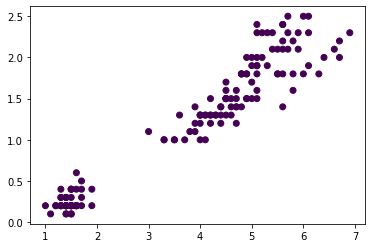

In [8]:
plt.scatter(X.T[0], X.T[1], c=np.zeros(150))
plt.show()

In [9]:
means, clusters, color = k_means(3, X)

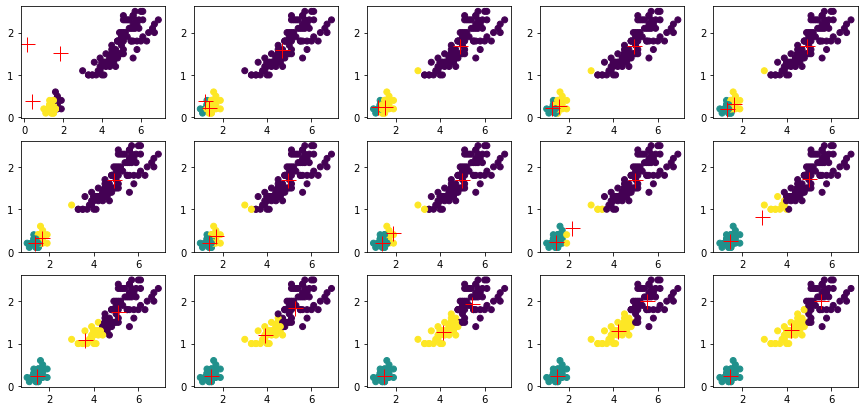

In [12]:
fig, axs = plt.subplots(3, 5, figsize=(15,7))

i, j = 0, 0
for index, mean in enumerate(means):
    axs[i, j].plot(mean[0][0], mean[0][1], marker='+', markersize=15, color='red')
    axs[i, j].plot(mean[1][0], mean[1][1], marker='+', markersize=15, color='red')
    axs[i, j].plot(mean[2][0], mean[2][1], marker='+', markersize=15, color='red')
    axs[i, j].scatter(X.T[0], X.T[1], c=color[index])
    j+=1
    if j == 5:
        i+=1
        j = 0
    if i == 3:
        break

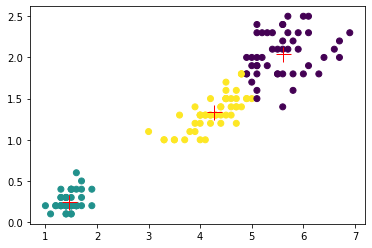

In [13]:
plt.plot(means[-1][0][0], means[-1][0][1], marker='+', markersize=15, color='red')
plt.plot(means[-1][1][0], means[-1][1][1], marker='+', markersize=15, color='red')
plt.plot(means[-1][2][0], means[-1][2][1], marker='+', markersize=15, color='red')
plt.scatter(X.T[0], X.T[1], c=color[-1])
plt.show()